# This is a sample Jupyter Notebook

Below is an example of a code cell. 
Put your cursor into the cell and press Shift+Enter to execute it and select the next one, or click 'Run Cell' button.

Press Double Shift to search everywhere for classes, files, tool windows, actions, and settings.

To learn more about Jupyter Notebooks in PyCharm, see [help](https://www.jetbrains.com/help/pycharm/ipython-notebook-support.html).
For an overview of PyCharm, go to Help -> Learn IDE features or refer to [our documentation](https://www.jetbrains.com/help/pycharm/getting-started.html).

In [10]:
import images
from tensorflow.python.keras.utils.version_utils import training

print("Hello World!")
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras import models, layers
import matplotlib.pyplot as plt
import os


Hello World!


In [13]:
IMAGE_SIZE = 256
BATCH_SIZE = 32
CHANNELS = 3
EPOCHS = 50

In [16]:
dataset = tf.keras.preprocessing.image_dataset_from_directory(
    "data/patato_deseases",
    shuffle=True,
    image_size=(IMAGE_SIZE, IMAGE_SIZE),
    batch_size=BATCH_SIZE
)

Found 2152 files belonging to 3 classes.


In [19]:
class_names = dataset.class_names
class_names

['Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy']

In [20]:
len(dataset)


68

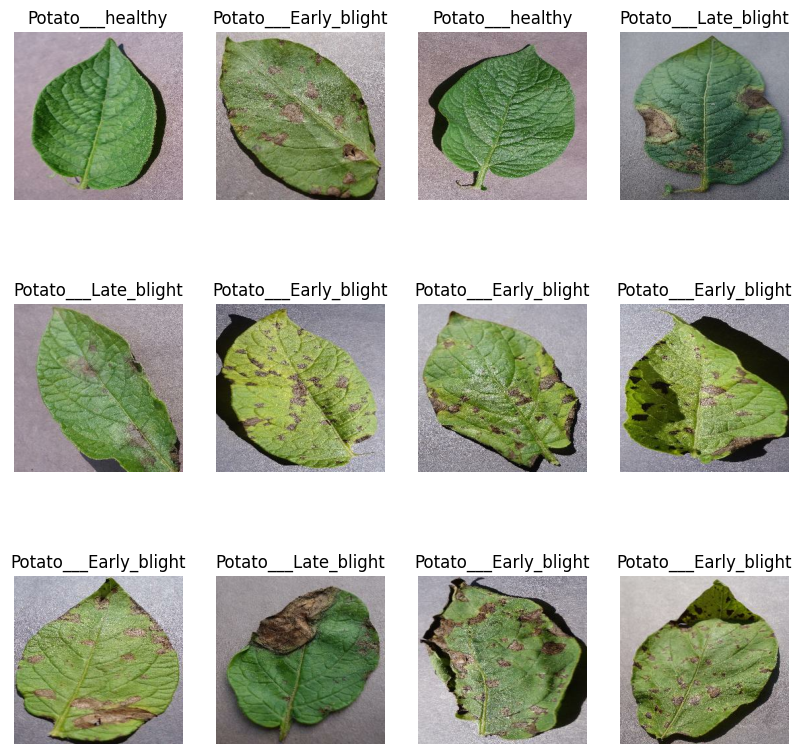

In [21]:
plt.figure(figsize=(10, 10))
for image_batch,label_batch in dataset.take(1):
    for i in range(12):
        ax = plt.subplot(3,4,i+1)
        plt.imshow(image_batch[i].numpy().astype("uint8"))
        plt.title(class_names[label_batch[i]])
        plt.axis("off")


In [38]:
len(dataset)

68

80% ==> training
20% ==> 10% validation, 10% test

In [22]:
train_size = 0.8
len(dataset)*train_size


54.400000000000006

In [23]:
train_ds = dataset.take(54)
len(train_ds)


54

In [24]:
test_ds = dataset.skip(54)
len(test_ds)

14

In [25]:
val_size = 0.1
len(dataset)*val_size

6.800000000000001

In [26]:
val_ds = test_ds.take(6)
len(val_ds)

6

In [27]:
test_ds = test_ds.skip(6)
len(test_ds)

8

In [28]:
def get_dataset_partitions_tf(ds, train_split = 0.8, test_split = 0.1, val_split = 0.1,shuffle_size = 10000, shuffle = True):
    ds_size = len(ds)

    if shuffle:
        ds = ds.shuffle(shuffle_size,seed = 12)

    train_size = int(train_split * ds_size)
    val_size = int(val_split * ds_size)

    train_ds = ds.take(train_size)

    val_ds = ds.skip(train_size).take(val_size)
    test_ds = ds.skip(train_size).skip(val_size)
    return train_ds, val_ds, test_ds


In [29]:
train_ds, val_ds, test_ds = get_dataset_partitions_tf(dataset)

In [30]:
len(train_ds)

54

In [31]:
len(test_ds)

8

In [32]:
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
val_ds = val_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
test_ds = test_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)

In [33]:
resize_and_rescale = tf.keras.Sequential([
    layers.Resizing(IMAGE_SIZE, IMAGE_SIZE),
    layers.Rescaling(1.0/255)

])

In [35]:
data_augmentation = tf.keras.Sequential([
    layers.RandomFlip("horizontal_and_vertical"),
    layers.RandomRotation(0.2),
])

In [36]:
input_shape = (BATCH_SIZE,IMAGE_SIZE, IMAGE_SIZE, CHANNELS)
n_classes = 3
model = models.Sequential([
    resize_and_rescale,
    data_augmentation,
    layers.Conv2D(32,(3, 3), activation="relu", input_shape= input_shape),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, kernel_size = (3, 3), activation="relu"),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, kernel_size = (3, 3), activation="relu"),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation="relu"),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation="relu"),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation="relu"),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(64, activation="relu"),
    layers.Dense(n_classes, activation="softmax"),

])

model.build(input_shape=input_shape)

C:\GREMAHTECH\GremahTech\Agri-Scan_Niger\training\.venv\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [38]:
model.summary()

Model: "sequential_8"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ sequential_5 (Sequential)       │ (32, 256, 256, 3)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ sequential_7 (Sequential)       │ (32, 256, 256, 3)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d (Conv2D)                 │ (32, 254, 254, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (32, 127, 127, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (32, 125, 125, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (32, 62, 62, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (32, 60, 60, 64)       │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (32, 30, 30, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (32, 28, 28, 64)       │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (32, 14, 14, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (32, 12, 12, 64)       │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (32, 6, 6, 64)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (32, 4, 4, 64)         │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (32, 2, 2, 64)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (32, 256)              │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (32, 64)               │        16,448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (32, 3)                │           195 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 183,747 (717.76 KB)

 Trainable params: 183,747 (717.76 KB)

 Non-trainable params: 0 (0.00 B)

In [40]:
model.compile(
    optimizer = "adam",
    loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    metrics=["accuracy"],
)

In [41]:
history = model.fit(
    train_ds,
    epochs=EPOCHS,
    batch_size=BATCH_SIZE,
    verbose=1,
    validation_data=val_ds
)

Epoch 1/50
54/54 ━━━━━━━━━━━━━━━━━━━━ 38s 599ms/step - accuracy: 0.5498 - loss: 0.8372 - val_accuracy: 0.7396 - val_loss: 0.6700
Epoch 2/50
54/54 ━━━━━━━━━━━━━━━━━━━━ 31s 575ms/step - accuracy: 0.7488 - loss: 0.6071 - val_accuracy: 0.8438 - val_loss: 0.4159
Epoch 3/50
54/54 ━━━━━━━━━━━━━━━━━━━━ 30s 565ms/step - accuracy: 0.7575 - loss: 0.5564 - val_accuracy: 0.7917 - val_loss: 0.5056
Epoch 4/50
54/54 ━━━━━━━━━━━━━━━━━━━━ 31s 575ms/step - accuracy: 0.8096 - loss: 0.4251 - val_accuracy: 0.8542 - val_loss: 0.3475
Epoch 5/50
54/54 ━━━━━━━━━━━━━━━━━━━━ 31s 570ms/step - accuracy: 0.8681 - loss: 0.3099 - val_accuracy: 0.9219 - val_loss: 0.2046
Epoch 6/50
54/54 ━━━━━━━━━━━━━━━━━━━━ 31s 572ms/step - accuracy: 0.9039 - loss: 0.2532 - val_accuracy: 0.9531 - val_loss: 0.1942
Epoch 7/50
54/54 ━━━━━━━━━━━━━━━━━━━━ 32s 584ms/step - accuracy: 0.9265 - loss: 0.1874 - val_accuracy: 0.9531 - val_loss: 0.1670
Epoch 8/50
54/54 ━━━━━━━━━━━━━━━━━━━━ 44s 811ms/step - accuracy: 0.9352 - loss: 0.1722 - val_accu

In [42]:
scores = model.evaluate(test_ds)

8/8 ━━━━━━━━━━━━━━━━━━━━ 5s 153ms/step - accuracy: 0.9844 - loss: 0.0487


In [43]:
history


In [44]:
history.params

{'verbose': 1, 'epochs': 50, 'steps': 54}

In [45]:
history.history.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

In [47]:
acc = history.history['accuracy']
val_acc  =history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

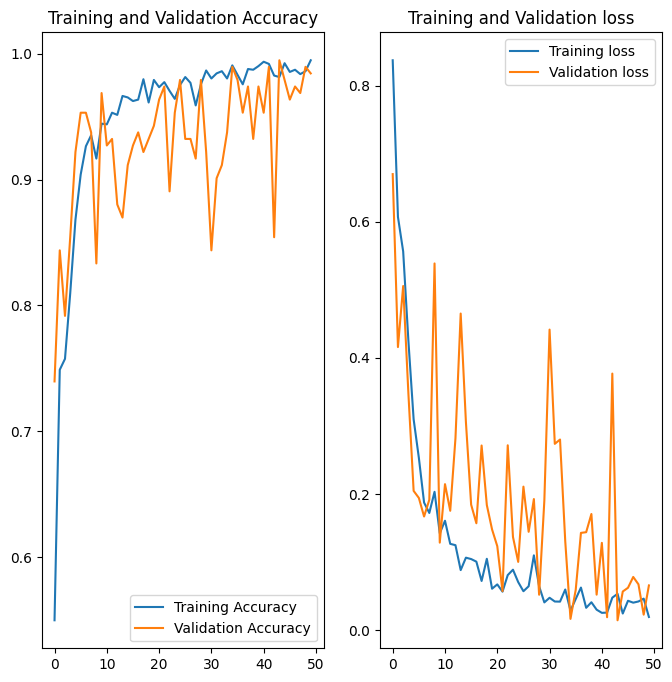

In [52]:
plt.figure(figsize=(8, 8))
plt.subplot(1,2,1)
plt.plot(range(EPOCHS), acc, label="Training Accuracy")
plt.plot(range(EPOCHS), val_acc, label="Validation Accuracy")
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')


plt.subplot(1,2,2)
plt.plot(range(EPOCHS), loss, label="Training loss")
plt.plot(range(EPOCHS), val_loss, label="Validation loss")
plt.legend(loc='upper right')
plt.title('Training and Validation loss')
plt.show()



In [62]:
np.argmax([1.000000e+00 ,1.739695e-10 ,1.511327e-20])

np.int64(0)

first image to predict
first image's actual label : Potato___Late_blight
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 319ms/step
predicted label: Potato___Late_blight


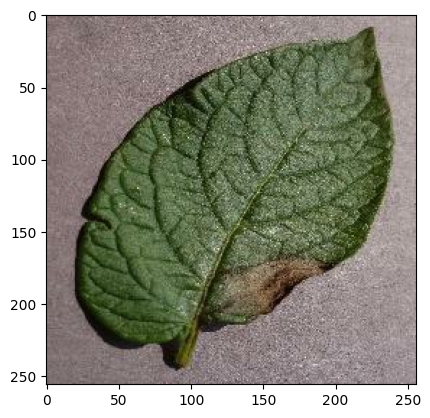

In [67]:
for images_batch, labels_batch in test_ds.take(1):
    first_image = (images_batch[0].numpy().astype('uint8'))
    first_label = labels_batch[0]

    print("first image to predict")
    plt.imshow(first_image)
    print("first image's actual label :", class_names[first_label])

    batch_prediction = model.predict(images_batch)
    print('predicted label:',class_names[np.argmax(batch_prediction[0])])

In [69]:
def predict(model, img):
    img_array = tf.keras.preprocessing.image.img_to_array(images[i].numpy())
    img_array = tf.expand_dims(img_array, 0) # Create a batch
    predictions = model.predict(img_array)
    predicted_class = class_names[np.argmax(predictions[0])]
    confidence = round(100 * (np.max(predictions[0])), 2)
    return predicted_class, confidence


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step


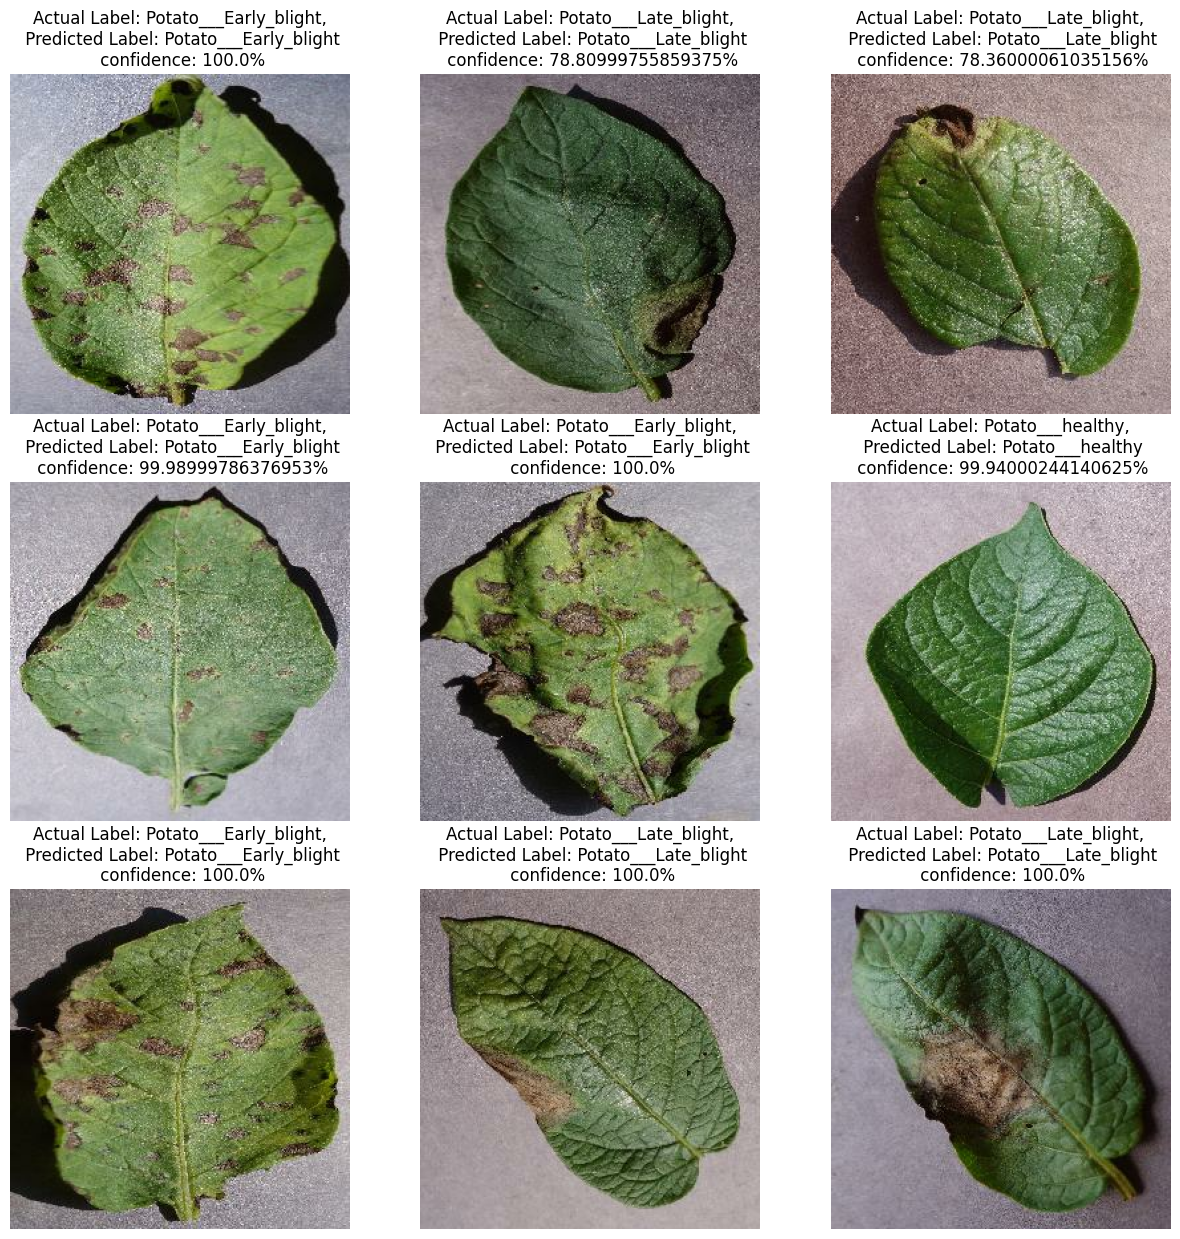

In [77]:
plt.figure(figsize=(15, 15))

for images, labels in test_ds.take(1):
    for i in range(9):
        ax = plt.subplot(3,3,i+1)
        plt.imshow(images[i].numpy().astype('uint8'))

        predicted_class, confidence = predict(model, images[i].numpy())
        actual_class = class_names[labels[i]]

        plt.title(f"Actual Label: {actual_class},\n Predicted Label: {predicted_class}\n confidence: {confidence}%")
        plt.axis("off")



In [82]:
model_version =3
model.save(f"./models/models/model_{model_version}.keras")

In [42]:
AUTOTUNE = tf.data.AUTOTUNE

train_ds = train_ds.cache().shuffle(1000).prefetch(AUTOTUNE)
val_ds   = val_ds.cache().prefetch(AUTOTUNE)


In [43]:
# Correction : on enlève '.experimental.preprocessing'
resize_and_rescale = tf.keras.Sequential([
    layers.Resizing(IMAGE_SIZE, IMAGE_SIZE), # ANCIEN : layers.experimental.preprocessing.Resizing
    layers.Rescaling(1.0/255)                  # ANCIEN : layers.experimental.preprocessing.Rescaling
])

In [44]:
data_augmentation = tf.keras.Sequential([
    layers.RandomFlip("horizontal_and_vertical"),
    layers.RandomRotation(0.2),
])

In [45]:
input_shape = (IMAGE_SIZE, IMAGE_SIZE, CHANNELS)
n_classes = len(class_names)

model = models.Sequential([
    layers.Input(shape=input_shape),
    resize_and_rescale,
    data_augmentation,

    layers.Conv2D(32, (3, 3), activation="relu", padding="same"),
    layers.BatchNormalization(),
    layers.MaxPooling2D(2, 2),

    layers.Conv2D(64, (3, 3), activation="relu", padding="same"),
    layers.BatchNormalization(),
    layers.MaxPooling2D(2, 2),

    layers.Conv2D(128, (3, 3), activation="relu", padding="same"),
    layers.BatchNormalization(),
    layers.MaxPooling2D(2, 2),

    layers.Conv2D(256, (3, 3), activation="relu", padding="same"),
    layers.BatchNormalization(),
    layers.MaxPooling2D(2, 2),

    layers.GlobalAveragePooling2D(),

    layers.Dropout(0.4),
    layers.Dense(128, activation="relu"),
    layers.Dense(n_classes, activation="softmax"),
])


In [46]:
model.summary()

Model: "sequential_11"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ sequential_9 (Sequential)       │ (None, 256, 256, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ sequential_10 (Sequential)      │ (None, 256, 256, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_12 (Conv2D)              │ (None, 256, 256, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_12          │ (None, 256, 256, 32)   │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_12 (MaxPooling2D) │ (None, 128, 128, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_13 (Conv2D)              │ (None, 128, 128, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_13          │ (None, 128, 128, 64)   │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_13 (MaxPooling2D) │ (None, 64, 64, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_14 (Conv2D)              │ (None, 64, 64, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_14          │ (None, 64, 64, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_14 (MaxPooling2D) │ (None, 32, 32, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_15 (Conv2D)              │ (None, 32, 32, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_15          │ (None, 32, 32, 256)    │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_15 (MaxPooling2D) │ (None, 16, 16, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d_3      │ (None, 256)            │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 3)              │           387 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 423,619 (1.62 MB)

 Trainable params: 422,659 (1.61 MB)

 Non-trainable params: 960 (3.75 KB)

In [47]:
model.compile(
    optimizer="adam",
    loss="sparse_categorical_crossentropy",
    metrics=["accuracy"],
)


In [49]:
history = model.fit(
    train_ds,
    epochs=EPOCHS,
    validation_data=val_ds,
    verbose=1
)



Epoch 1/50
 2/54 ━━━━━━━━━━━━━━━━━━━━ 1:39 2s/step - accuracy: 1.0000 - loss: 0.0079

KeyboardInterrupt: 

In [62]:
from tensorflow import keras

model = keras.models.load_model("models/my_model_v2.keras")


In [63]:
scores = model.evaluate(test_ds)

7/7 ━━━━━━━━━━━━━━━━━━━━ 3s 343ms/step - accuracy: 0.9821 - loss: 0.0710


In [64]:
scores

[0.07095429301261902, 0.9821428656578064]

In [65]:
history

train_ds = tf.keras.utils.image_dataset_from_directory(
    "data/patato_deseases",
    validation_split=0.2,
    subset="training",
    seed=123,
    image_size=(IMAGE_SIZE, IMAGE_SIZE),
    batch_size=BATCH_SIZE
)

val_ds = tf.keras.utils.image_dataset_from_directory(
    "data/patato_deseases",
    validation_split=0.2,
    subset="validation",
    seed=123,
    image_size=(IMAGE_SIZE, IMAGE_SIZE),
    batch_size=BATCH_SIZE
)
from tensorflow.python.keras.utils.version_utils import training

print("Hello World!")
import tensorflow as tf
from tensorflow.keras import models, layers
import matplotlib.pyplot as plt
IMAGE_SIZE = 256
BATCH_SIZE = 32
CHANNELS = 3
EPOCHS = 50
dataset = tf.keras.preprocessing.image_dataset_from_directory(
    "data/patato_deseases",
    shuffle=True,
    image_size=(IMAGE_SIZE, IMAGE_SIZE),
    batch_size=BATCH_SIZE
)
class_names = dataset.class_names
class_names
len(dataset)
plt.figure(figsize=(10, 10))
for image_batch,label_batch in dataset.take(1):
    for

In [66]:
from tensorflow import keras

# 1. Évaluation de la VERSION 1 (my_model.keras)
try:
    model_v1 = keras.models.load_model("models/my_model.keras")
    scores_v1 = model_v1.evaluate(test_ds, verbose=0)
    print(f"✅ Performance V1 (my_model.keras) sur TEST_DS:")
    print(f"   - Loss: {scores_v1[0]:.4f}")
    print(f"   - Accuracy: {scores_v1[1]:.4f}")
except Exception as e:
    print(f"❌ Erreur lors du chargement de V1: {e}")

print("-" * 30)

# 2. Évaluation de la VERSION 2 (my_model_v2.keras)
try:
    model_v2 = keras.models.load_model("models/my_model_v2.keras")
    scores_v2 = model_v2.evaluate(test_ds, verbose=0)
    print(f"✅ Performance V2 (my_model_v2.keras) sur TEST_DS:")
    print(f"   - Loss: {scores_v2[0]:.4f}")
    print(f"   - Accuracy: {scores_v2[1]:.4f}")
except Exception as e:
    print(f"❌ Erreur lors du chargement de V2: {e}")

✅ Performance V1 (my_model.keras) sur TEST_DS:
   - Loss: 1.1652
   - Accuracy: 0.8348
------------------------------
✅ Performance V2 (my_model_v2.keras) sur TEST_DS:
   - Loss: 0.0710
   - Accuracy: 0.9821


Historique V2 chargé avec succès.


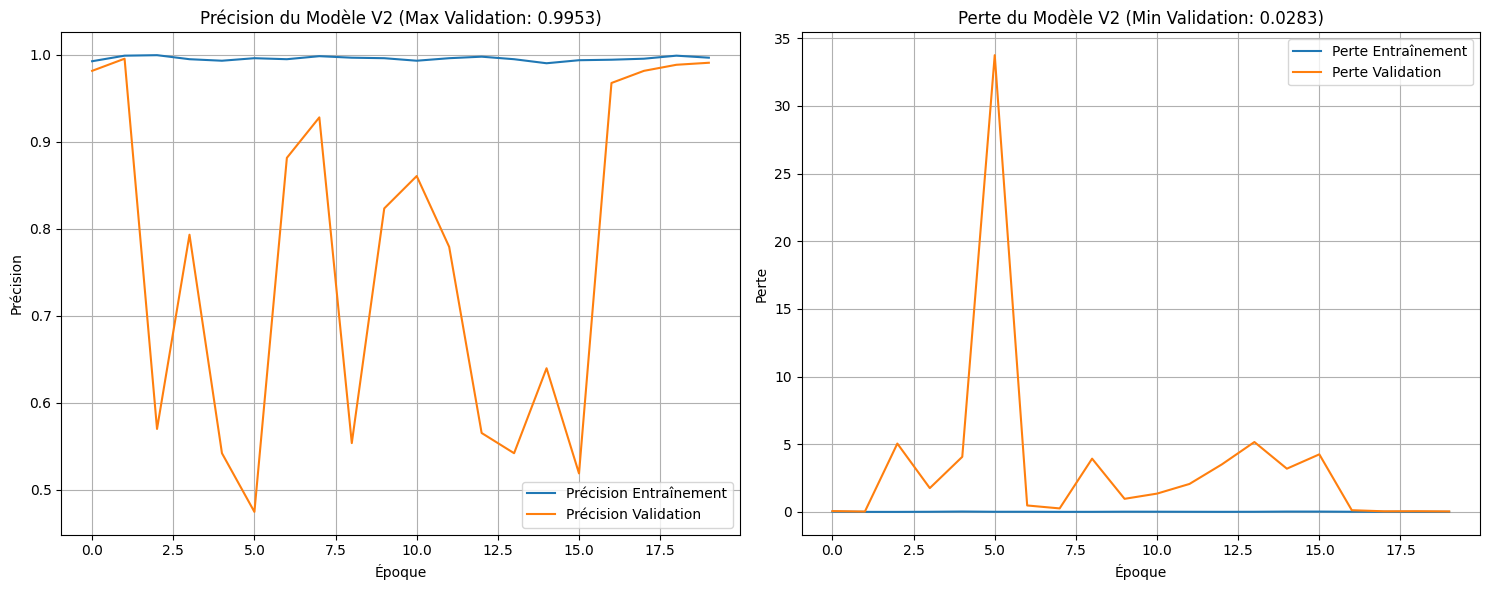

In [68]:
import pandas as pd
import matplotlib.pyplot as plt

# 1. Chargement des données d'historique V2
# Nous utilisons le chemin spécifié par vous : "histories/history_v2.csv"
try:
    history_df = pd.read_csv("histories/history_v2.csv")
    print("Historique V2 chargé avec succès.")
except FileNotFoundError:
    print("Erreur : Le fichier 'history_v2.csv' n'a pas été trouvé dans le dossier 'histories/'.")
    # Vous devriez vérifier le chemin si cette erreur apparaît.
    # Dans ce cas, nous arrêtons le traçage.
    exit()

# Assurez-vous que l'index commence à 0 (colonne 'Unnamed: 0' si elle existe)
if 'Unnamed: 0' in history_df.columns:
    history_df = history_df.drop(columns=['Unnamed: 0'])

# 2. Préparation des données pour le graphique
epochs_range = history_df.index.values # Les numéros des époques
acc = history_df['accuracy']
val_acc = history_df['val_accuracy']
loss = history_df['loss']
val_loss = history_df['val_loss']

# 3. Création des graphiques

plt.figure(figsize=(15, 6))

# --- Graphe 1: Précision (Accuracy) ---
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Précision Entraînement')
plt.plot(epochs_range, val_acc, label='Précision Validation')
plt.title(f"Précision du Modèle V2 (Max Validation: {val_acc.max():.4f})")
plt.ylabel('Précision')
plt.xlabel('Époque')
plt.legend(loc='lower right')
plt.grid(True)

# --- Graphe 2: Perte (Loss) ---
plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Perte Entraînement')
plt.plot(epochs_range, val_loss, label='Perte Validation')
plt.title(f"Perte du Modèle V2 (Min Validation: {val_loss.min():.4f})")
plt.ylabel('Perte')
plt.xlabel('Époque')
plt.legend(loc='upper right')
plt.grid(True)

plt.tight_layout()
plt.show()

first image to predict
first image's actuel label : Potato___Late_blight


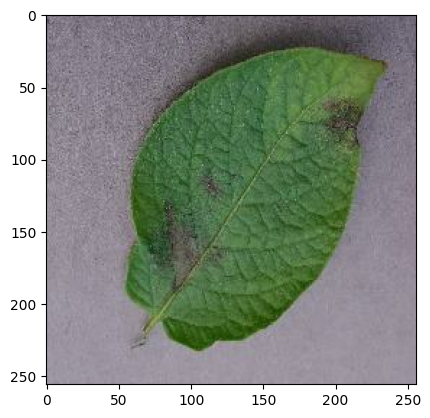

In [69]:
for image_batch, label_batch in test_ds.take(1):
    first_image = image_batch[0].numpy().astype('uint8')
    first_label = label_batch[0].numpy()

    print("first image to predict")
    plt.imshow(first_image)
    print("first image's actuel label :", class_names[first_label])

In [73]:
# --- Étape de Prédiction ---

# 1. Préparer l'image pour le modèle
# Le modèle attend un "batch" (lot) d'images.
# Nous transformons l'image unique (256, 256, 3) en un lot de taille 1 (1, 256, 256, 3).
image_for_prediction = tf.expand_dims(image_batch[0], 0)

# 2. Lancer la prédiction avec le modèle V2
# Note : Le modèle V2 a déjà les couches de prétraitement (redimensionnement/rescaling) intégrées.
predictions = model.predict(image_for_prediction)

# 3. Interpréter le résultat
predicted_class_index = np.argmax(predictions[0])
confidence = np.max(predictions[0])
predicted_class_name = class_names[predicted_class_index]

# --- Affichage du Résultat ---

print("\n" + "="*50)
print("🔎 RÉSULTAT DE L'ANALYSE PAR MODÈLE V2")
print("-" * 50)
print(f"ÉTAT RÉEL (Label Actuel) : **{class_names[first_label]}**")
print(f"PRÉDICTION DU MODÈLE :     **{predicted_class_name}**")
print(f"CONFIANCE :                **{confidence*100:.2f}%**")
print("-" * 50)

# Vérification du succès de la prédiction
if predicted_class_index == first_label:
    print("✅ Le modèle a prédit la classe **correctement**.")
else:
    print(f"❌ Le modèle a prédit la classe **incorrectement**. (Il a dit {predicted_class_name} au lieu de {class_names[first_label]})")

print("="*50)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step

🔎 RÉSULTAT DE L'ANALYSE PAR MODÈLE V2
--------------------------------------------------
ÉTAT RÉEL (Label Actuel) : **Potato___Late_blight**
PRÉDICTION DU MODÈLE :     **Potato___Late_blight**
CONFIANCE :                **100.00%**
--------------------------------------------------
✅ Le modèle a prédit la classe **correctement**.


In [76]:
def predict_internet_image(model, img_path):
    """
    Charge une image externe, effectue le prétraitement et la prédiction.
    """
    if not os.path.exists(img_path):
        print(f"❌ Erreur: Le fichier d'image n'existe pas au chemin : {img_path}")
        return None, 0.0

    # 1. Charger l'image et la redimensionner à 256x256
    img = tf.keras.utils.load_img(
        img_path,
        target_size=(IMAGE_SIZE, IMAGE_SIZE)
    )

    # 2. Convertir en tableau Numpy
    img_array = tf.keras.utils.img_to_array(img)

    # 3. Ajouter la dimension de lot : (1, 256, 256, 3)
    img_array_batch = tf.expand_dims(img_array, 0)

    # 4. Prédiction (Le modèle V2 se charge de la normalisation 1/255)
    predictions = model.predict(img_array_batch)

    # 5. Interpréter
    predicted_class_index = np.argmax(predictions[0])
    confidence = np.max(predictions[0])

    return predictions, class_names[predicted_class_index], confidence

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step


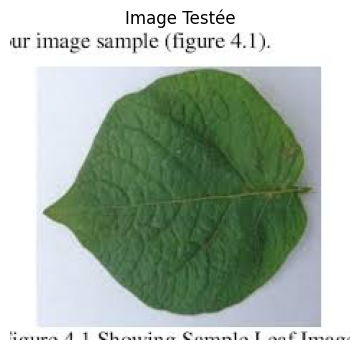


🔎 RÉSULTAT DE L'ANALYSE SUR IMAGE EXTERNE
--------------------------------------------------
PRÉDICTION DU MODÈLE :     **Potato___Early_blight**
CONFIANCE :                **99.80%**


In [85]:
# CHANGEZ CE CHEMIN vers l'image téléchargée
INTERNET_IMAGE_PATH = "./external_images/test7.jpeg"

# Lancer la prédiction
predictions_raw, predicted_class, confidence = predict_internet_image(model, INTERNET_IMAGE_PATH)

if predicted_class:
    # Affichage de l'image
    plt.figure(figsize=(8, 4))
    plt.imshow(plt.imread(INTERNET_IMAGE_PATH))
    plt.title(f"Image Testée")
    plt.axis('off')
    plt.show()

    print("\n" + "="*50)
    print("🔎 RÉSULTAT DE L'ANALYSE SUR IMAGE EXTERNE")
    print("-" * 50)
    print(f"PRÉDICTION DU MODÈLE :     **{predicted_class}**")
    print(f"CONFIANCE :                **{confidence*100:.2f}%**")
    print("="*50)

    # Nous allons maintenant afficher les probabilités détaillées !
    # Voir l'étape 4.

In [6]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import os

# 1. Chargement de votre modèle V2 (qui contient les poids entraînés)
try:
    model_v2 = keras.models.load_model("models/models/my_model_v2.keras")
    print("Modèle V2 chargé avec succès.")
except Exception as e:
    print(f"Erreur lors du chargement du modèle: {e}")
    # Arrêtez ici si le modèle ne charge pas
    exit()

# Afficher le résumé pour confirmer les index (Optionnel, mais utile)
# model_v2.summary()

# 2. Créer un nouveau modèle SANS les 3 premières couches (Input, Resize/Rescale, Data_Augmentation)
# Nous commençons à l'index 3, qui est la première Conv2D.
try:
    model_core_cnn = keras.Sequential(model_v2.layers[3:])
    print("✅ Cœur du CNN extrait (Commence à la première Conv2D).")
except IndexError:
    print("❌ Erreur d'index: L'architecture a changé. Veuillez vérifier model_v2.summary().")
    exit()

# Charger les noms de classes (doit être fait une seule fois et dans le bon ordre)
# Ici, nous le rechargeons pour être sûr
dataset = tf.keras.preprocessing.image_dataset_from_directory(
    "data/patato_deseases",
    shuffle=True,
    image_size=(256, 256),
    batch_size=32
)
class_names = dataset.class_names
IMAGE_SIZE = 256

Modèle V2 chargé avec succès.
✅ Cœur du CNN extrait (Commence à la première Conv2D).
Found 2152 files belonging to 3 classes.


In [9]:
def predict_clean(model_core_cnn, img_path):
    """ Prédit en appliquant manuellement le prétraitement minimal. """

    if not os.path.exists(img_path):
        print(f"❌ Erreur: Le fichier d'image n'existe pas au chemin : {img_path}")
        return "Fichier non trouvé", 0.0

    # 1. Charger et redimensionner à 256x256 (Equivalent de layers.Resizing)
    img = tf.keras.utils.load_img(img_path, target_size=(IMAGE_SIZE, IMAGE_SIZE))
    img_array = tf.keras.utils.img_to_array(img)

    # 2. Normalisation MANUELLE (Equivalent de layers.Rescaling(1.0/255))
    # Ceci est crucial et doit être fait pour le CNN
    img_array_normalized = img_array / 255.0

    # 3. Ajouter la dimension de lot : (1, 256, 256, 3)
    img_array_batch = tf.expand_dims(img_array_normalized, 0)

    # 4. Prédiction avec le cœur du CNN (qui commence par Conv2D)
    predictions = model_core_cnn.predict(img_array_batch)

    # 5. Interpréter
    predicted_class_index = np.argmax(predictions[0])
    confidence = np.max(predictions[0])

    return class_names[predicted_class_index], confidence

# --- TEST AVEC UNE IMAGE QUI POSAIT PROBLÈME (Ex: test6.jpeg) ---

# Remplacez ce chemin par le chemin réel de l'image (test4, test5 ou test6)
problem_image_path = "./external_images/test7.jpeg"

new_prediction, new_confidence = predict_clean(model_core_cnn, problem_image_path)

print("\n" + "="*50)
print(f"Prédiction après suppression du filtre : **{new_prediction}**")
print(f"Confiance : **{new_confidence*100:.2f}%**")
print("="*50)

ValueError: Input 0 of layer "batch_normalization" is incompatible with the layer: expected axis -1 of input shape to have value 32, but received input with shape (1, 256, 256, 3)